# Programa en Python

## Tema 9. Comprimir datos mediante la reducción de dimensionalidad: caso práctico bupa

### Prof. Manuel S

<br>
<br>

# Compresion de datos supervisada mediante análisis discriminante lineal

<br>
<br>

<a id='beginning'></a>

**Caso: determinantes de las palabras claves para Marketing.**

1. [Importar la data](#part1)


2. [Estandarizar los datos](#part2)


3. [Calcula las matrices de dispersión](#part3)


4. [Seleccionar discriminantes lineales para el nuevo subespacio de caracteristicas](#part4)


5. [Proyección de muestras en el nuevo espacio de características](#part5)


<a id='part1'></a>
## Importar la data

In [1]:
import pandas as pd

In [3]:
bu= pd.read_excel('C:/Users/SOCIAL DATA/Dropbox/PYTHON/2. intermedio/sesión_5/datos/diabetes_py.xlsx')

In [4]:
bu

,Clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157
5,1,100,350,221
6,1,85,301,186
7,1,97,379,142
8,1,97,296,131
9,1,91,353,221


<a id='part2'></a>
## Estandarizar los datos

A continuación los datos Wine en conjuntos de prueba y de entrenamiento separados ( utilizando el 70% y el 30 % respectivamente ) y lo estandarizaremos a la varianza de la unidad.

In [5]:
from sklearn.model_selection import train_test_split
x, y = bu.iloc[:, 1:].values, bu.iloc[:, 0].values
x_train, x_test, y_train, y_test = \
    train_test_split (x, y, test_size=0.3,
                        stratify=y,
                     random_state=0)

# estandarizar las caracteristicas

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std= sc.fit_transform(x_train)
x_test_std= sc.transform(x_test)

In [6]:
x_train_std

array([[-1.34442197e-01, -1.42449807e-02,  1.28082231e+00],
       [-5.47448628e-01, -6.79289240e-01, -1.72161138e-01],
       [-1.17233596e-01,  1.06064534e-01,  4.96113369e+00],
       [ 3.76438153e-02,  3.66735148e-01,  1.18511682e+00],
       [-5.64657229e-01, -5.12192693e-01, -3.29531426e-02],
       [ 2.79102002e+00,  3.15390556e+00, -1.07701311e+00],
       [-4.44197020e-01,  1.79587015e-01, -3.98374130e-01],
       [-4.78614223e-01, -5.69005519e-01,  1.84559350e-01],
       [-8.22786248e-01, -5.55637795e-01, -3.80973131e-01],
       [-6.50700236e-01, -6.45869931e-01, -4.07074630e-01],
       [-3.23736812e-01, -5.58979726e-01,  6.27523541e-02],
       [-4.26988419e-01, -7.36102067e-01,  3.67269844e-01],
       [-5.47448628e-01, -4.85457245e-01, -1.80861638e-01],
       [-3.23736812e-01, -5.02166900e-01, -3.80973131e-01],
       [-5.30240027e-01, -7.36102067e-01,  1.84885619e-03],
       [-3.75362615e-01, -2.34812424e-01,  1.28952281e+00],
       [ 4.85067448e-01,  1.07188258e+00

<a id='part3'></a>
## Calcula las matrices de dispersión


Calcule los vectores medios para cada clase:

In [8]:
import numpy as np
np.set_printoptions(precision=2)

mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(x_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [-0.45 -0.58 -0.09]

MV 2: [-0.33 -0.07  0.82]

MV 3: [ 1.66  1.74 -0.66]



Calcular la matriz de dispersión dentro de la clase:

In [9]:
d = 3 # número de características
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # matriz de dispersión para cada clase
    for row in x_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # hacer vectores de columna
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 3x3


La suposición de lo que estamos haciendo cuando calculamos las matrices de disperción es que las etiquetas de clase en el conjunto de datos de entrenamiento estan distribuidas uniformemente. Sin embargo, si mostramos el número de etiquetas de clase, vemos que se ha incumplido dicha suposición:

In [10]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [46 18 16]


Por lo tanto, debemos escalar las matrices de disperción individuales $S_i$ antes de sumarlo como matriz de dispersión $S_w$

In [11]:
d = 3  # número de caracterisicas.
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(x_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 3x3


Calcular la matriz de dispersión entre clases $S_w$:

In [12]:
mean_overall = np.mean(x_train_std, axis=0)
d = 3  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = x_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 3x3


<br>
<br>

<a id='part4'></a>
## Seleccionar discriminantes lineales para el nuevo subespacio de caracteristicas

Resolver el problema generalizado del valor propio para la matriz $S_W^{-1}S_B$:

In [13]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

**Note**:
    
Arriba, utilicé la función  [`numpy.linalg.eig`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) para descomponer la matriz de covarianza simétrica en sus autovalores y autovectores.
    <pre>>>> eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)</pre>
    Esto no es realmente un "error", pero probablemente no es óptimo. Sería mejor utilizar  [`numpy.linalg.eigh`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html) en tales casos, que ha sido diseñado para [Hermetian matrices](https://en.wikipedia.org/wiki/Hermitian_matrix). Este último siempre devuelve valores propios; mientras que el numéricamente menos estable `np.linalg.eig` puede descomponer matrices cuadradas no simétricas, puede encontrar que devuelve valores propios complejos en ciertos casos. 

Ordenar los autovectores en orden descendente de los valores propios:

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

89.62439698615088
9.910549154311862
6.804621745817063e-14


Para medir la cantidad de información discriminante de clase capturada por los discriminantes lineales(autovectores), vamos a representar gráficamente los discriminantes lineales reduciendo los autovalores. 

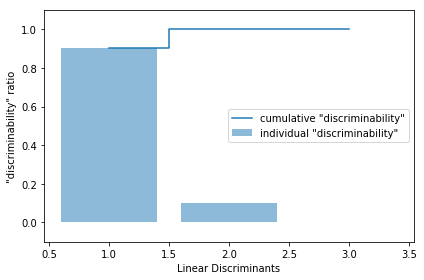

In [16]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 4), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 4), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

    *  Como podemos observar en la imagen, los dos primeros discriminantes linelaes capturan el 100% de la información util.

In [18]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.48 -0.72]
 [-0.87  0.67]
 [-0.02  0.19]]


<br>
<br>

<a id='part5'></a>
## Proyección de muestras en el nuevo espacio de características

Mediante la matriz de transformación **W** creada en la sección anterior, podemos transformar ahora el conjunto de datos de entrenamiento multiplicando las matrices.  

In [19]:
X_train_lda = x_train_std.dot(w)
X_train_lda

array([[-7.46e-02,  3.31e-01],
       [ 3.32e-01, -9.28e-02],
       [-2.35e-01,  1.10e+00],
       [-3.23e-01,  4.44e-01],
       [ 1.75e-01,  5.77e-02],
       [-1.39e+00, -1.06e-01],
       [-3.65e-01,  3.64e-01],
       [ 2.63e-01, -6.72e-04],
       [ 9.38e-02,  1.48e-01],
       [ 2.57e-01, -4.09e-02],
       [ 3.31e-01, -1.29e-01],
       [ 4.31e-01, -1.15e-01],
       [ 1.62e-01,  3.51e-02],
       [ 2.89e-01, -1.75e-01],
       [ 3.87e-01, -1.10e-01],
       [ 1.38e-03,  3.59e-01],
       [-6.91e-01,  2.43e-01],
       [ 4.21e-01, -1.45e-01],
       [ 2.30e-01,  2.13e-04],
       [-8.84e-01, -6.47e-01],
       [ 4.13e-02,  1.74e-02],
       [ 4.31e-02,  5.35e-02],
       [ 2.99e-03,  2.79e-01],
       [ 2.33e-01, -2.22e-01],
       [-1.06e-01,  6.30e-01],
       [-5.72e-01, -1.37e-01],
       [ 2.18e-01,  1.71e-01],
       [ 7.06e-02,  2.11e-01],
       [-4.22e-01, -1.26e-01],
       [ 4.47e-02,  8.10e-02],
       [ 1.42e-01, -5.09e-02],
       [ 4.04e-01, -2.50e-01],
       [

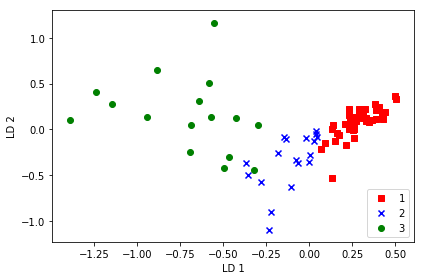

In [37]:

colors = ['r', 'b']
markers = ['s', 'x']

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

    * Como podemos ver en el diagrama resultante, la data puede ser separadas linealmente a la perfección en 3 clases a 2, en el nuevo subespacio de caracteristicas.

<br>
<br>